# Rainfall studies

In [1]:
# Import needed packages.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from pyhdf.SD import SD, SDC # To install this package with conda run:
                             # >>> conda install -c conda-forge pyhdf

# Ignoring matplotlib warning messages.
import warnings
warnings.filterwarnings('ignore')     
    
from matplotlib.patches import Polygon
    
%matplotlib inline   

In [2]:
# Open file.
directory = '/home/alex/Dropbox/doutorado/rainfall_data/'
file = '3B42.20161231.00.7.HDF'
hdf = SD(directory + file)

# List available SDS datasets
hdf.datasets()

{'HQprecipitation': (('nlon', 'nlat'), (1440, 400), 5, 3),
 'IRprecipitation': (('nlon', 'nlat'), (1440, 400), 5, 4),
 'InputAlgorithmVersions': (('fakeDim3',), (0,), 3, 7),
 'InputFileNames': (('fakeDim2',), (0,), 3, 6),
 'InputGenerationDateTimes': (('fakeDim4',), (0,), 3, 8),
 'precipitation': (('nlon', 'nlat'), (1440, 400), 5, 0),
 'relativeError': (('nlon', 'nlat'), (1440, 400), 5, 1),
 'satObservationTime': (('nlon', 'nlat'), (1440, 400), 20, 5),
 'satPrecipitationSource': (('nlon', 'nlat'), (1440, 400), 22, 2)}

In [3]:
# Read dataset.
datafield_name = 'precipitation'
data_hdf = hdf.select(datafield_name)
data = data_hdf[:]

# Recover latitude and longitude vectors.
lat_size = data.shape[0]
lon_size = data.shape[1]
lat = np.linspace(0, 360, lat_size)
lon = np.linspace(-50, 50, lon_size)

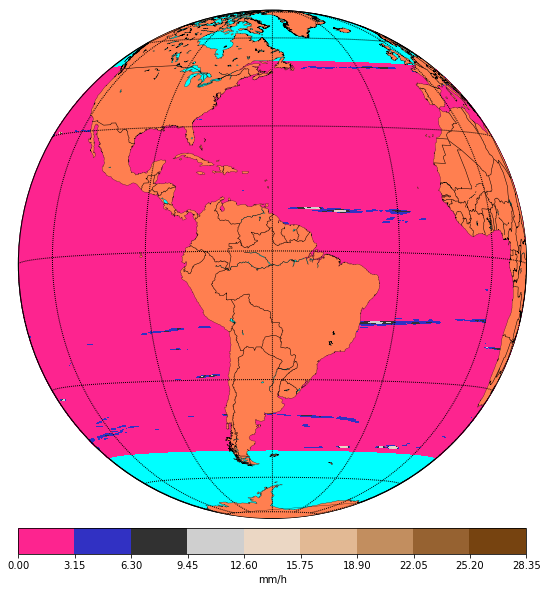

In [4]:
# Testing how to draw a map with precipitation values around the World.
# Make the map.
map = Basemap(projection='ortho', 
              lon_0=-60, lat_0=-3,
              resolution='l')
plt.figure(figsize=(16, 10))
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.5)
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30));

# Put data on the map.
lat = np.linspace(-50, 50, lat_size)
lon = np.linspace(0, 360, lon_size)
LAT, LON = np.meshgrid(lat, lon)
Z = data.T
X, Y = map(LON, LAT)
clevs = np.linspace(np.min(data), np.max(data), 10)
cs = map.contourf(X, Y, Z, clevs, cmap=cm.s3pcpn)
cbar = map.colorbar(cs,location='bottom',pad="2%")
cbar.set_label('mm/h')

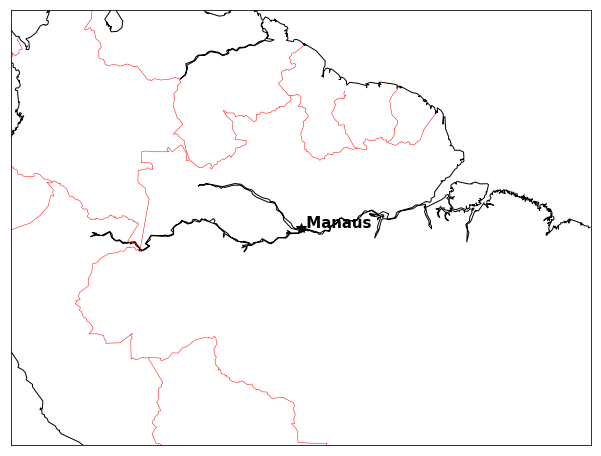

In [5]:
# Testing how to draw a map with precipitation values around Manaus.
m = Basemap(projection='stere', 
            lon_0=-60, lat_0=-3,
            width=4000e3, height=3000e3, 
            rsphere=6371e3, resolution='l', area_thresh=10000)
plt.figure(figsize=(16, 8));
x, y = m(-60, -3)
m.drawcoastlines()
# m.drawstates()
m.drawcountries(color='red');
plt.plot(x, y, '*k', markersize=10)
plt.text(x, y, ' Manaus', fontsize=15, fontweight='bold', color='black');

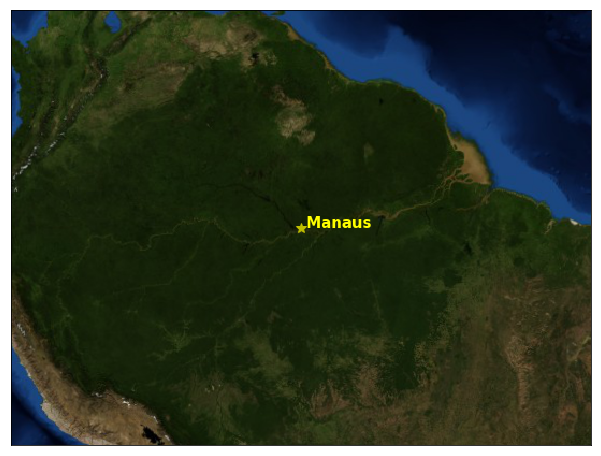

In [6]:
# Draw a approximately Manaus centered map.
m = Basemap(projection='lcc', resolution=None,
            width=4000e3, height=3000e3, 
            lat_0=-3, lon_0=-60.0)
x, y = m(-60, -3)
plt.figure(figsize=(16, 8))
m.bluemarble();
plt.plot(x, y, '*y', markersize=10)
plt.text(x, y, ' Manaus', fontsize=15, fontweight='bold', color='yellow');